## Import modules

In [3]:
import numpy as np
import pandas as pd

## read data

In [4]:
dataset = pd.read_csv("per.csv")
dataset.head()

,NewsID,Title,Body,Date,Time,Category,Category2
0,843656,\nوزير علوم درجمع استادان نمونه: سن بازنشستگي ...,\nوزير علوم در جمع استادان نمونه كشور گفت: از ...,\n138/5//09,\n0:9::18,\nآموزشي-,\nآموزشي
1,837144,\nگردهمايي دانش‌آموختگان موسسه آموزش عالي سوره...,\nبه گزارش سرويس صنفي آموزشي خبرگزاري دانشجويا...,\n138/5//09,\n1:4::11,\nآموزشي-,\nآموزشي
2,436862,\nنتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور...,\nنتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و...,\n138/3//07,\n1:0::03,\nآموزشي-,\nآموزشي
3,227781,\nهمايش يكروزه آسيب شناسي مفهوم روابط عمومي در...,\n,\n138/2//02,\n1:3::42,\nاجتماعي-خانواده-,\nاجتماعي
4,174187,\nوضعيت اقتصادي و ميزان تحصيلات والدين از مهمت...,\nمحمدتقي علوي يزدي، مجري اين طرح پژوهشي در اي...,\n138/1//08,\n1:1::49,\nآموزشي-,\nآموزشي


## encode labels

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset["labels"] = le.fit_transform(dataset["Category2"])
dataset.head()

,NewsID,Title,Body,Date,Time,Category,Category2,labels
0,843656,\nوزير علوم درجمع استادان نمونه: سن بازنشستگي ...,\nوزير علوم در جمع استادان نمونه كشور گفت: از ...,\n138/5//09,\n0:9::18,\nآموزشي-,\nآموزشي,0
1,837144,\nگردهمايي دانش‌آموختگان موسسه آموزش عالي سوره...,\nبه گزارش سرويس صنفي آموزشي خبرگزاري دانشجويا...,\n138/5//09,\n1:4::11,\nآموزشي-,\nآموزشي,0
2,436862,\nنتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور...,\nنتايج آزمون دوره‌هاي فراگير مقاطع كارشناسي و...,\n138/3//07,\n1:0::03,\nآموزشي-,\nآموزشي,0
3,227781,\nهمايش يكروزه آسيب شناسي مفهوم روابط عمومي در...,\n,\n138/2//02,\n1:3::42,\nاجتماعي-خانواده-,\nاجتماعي,1
4,174187,\nوضعيت اقتصادي و ميزان تحصيلات والدين از مهمت...,\nمحمدتقي علوي يزدي، مجري اين طرح پژوهشي در اي...,\n138/1//08,\n1:1::49,\nآموزشي-,\nآموزشي,0


In [6]:
dataset["labels"].value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         1
4         0
         ..
10994    10
10995    10
10996    10
10997    10
10998    10
Name: labels, Length: 10999, dtype: int32>

## Read Stopwords

In [7]:
with open("stopwords.txt", encoding="utf8") as stopwords_file:
    stopwords = stopwords_file.readlines()
stopwords = [line.replace('\n', ' ') for line in stopwords]
stopwords

['! ',
 '" ',
 '# ',
 '$ ',
 '% ',
 '& ',
 "' ",
 '( ',
 ') ',
 '* ',
 '+ ',
 ', ',
 '- ',
 '. ',
 '... ',
 '.... ',
 '/ ',
 ': ',
 '< ',
 '= ',
 '> ',
 '@ ',
 '[ ',
 '\\ ',
 '] ',
 '^ ',
 '_ ',
 '` ',
 '{ ',
 '| ',
 '} ',
 '~ ',
 '« ',
 '» ',
 '، ',
 '؛ ',
 '؟ ',
 'ء ',
 'آاو و و و ',
 'آباد ',
 'آخ ',
 'آخر ',
 'آخرها ',
 'آخه ',
 'آدمهاست ',
 'آرام ',
 'آرام آرام ',
 'آره ',
 'آری ',
 'آزادانه ',
 'آسان ',
 'آسانی ',
 'آسيب پذيرند ',
 'آسیب ',
 'آسیب پذیرند ',
 'آشكارا ',
 'آشنايند ',
 'آشنایند ',
 'آشکارا ',
 'آقا ',
 'آقای ',
 'آقایان ',
 'آمد ',
 'آمدن ',
 'آمده ',
 'آمرانه ',
 'آن ',
 'آن ها ',
 'آن گاه ',
 'آنان ',
 'آناني ',
 'آنانی ',
 'آنجا ',
 'آنرا ',
 'آنطور ',
 'آنقدر ',
 'آنكه ',
 'آنها ',
 'آنهاست ',
 'آنچنان ',
 'آنچنان كه ',
 'آنچنان که ',
 'آنچه ',
 'آنکه ',
 'آنگاه ',
 'آن\u200cها ',
 'آهان ',
 'آهاي ',
 'آهای ',
 'آور ',
 'آورد ',
 'آوردن ',
 'آورده ',
 'آوه ',
 'آيا ',
 'آيد ',
 'آی ',
 'آیا ',
 'آید ',
 'آیند ',
 'ا ',
 'ابدا ',
 'ابلهانه ',
 'ات ',
 'اتفاقا ',


## Using hazm for Language preprocessing

In [8]:
import hazm
from hazm import word_tokenize

stemmer = hazm.Stemmer()

# main data for training model
data = pd.DataFrame(columns=('text_body', 'labels'))
for index, row in dataset.iterrows():
    title_body = row['Title'] + ' ' + row['Body']
    tokenized_title_body = word_tokenize(title_body)
    filtered_tokenized_title_body = [w for w in tokenized_title_body if not w in stopwords]
    stemmed_filtered_tokenized_title_body = [stemmer.stem(w) for w in filtered_tokenized_title_body]
    data.loc[index] = {
        'text_body': ' '.join(stemmed_filtered_tokenized_title_body),
        'labels': row['labels']
    }

In [9]:
data.head()

,text_body,labels
0,وزير علو درجمع استاد نمونه : سن بازنشستگي استا...,0
1,گردهمايي دانش‌آموختگ موسسه آموز عالي سوره برگز...,0
2,نتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور ا...,0
3,هماي يكروزه آسيب شناسي مفهو روابط عمومي در باب...,1
4,وضعي اقتصادي ميز تحصيل والدين از مهمترين عوامل...,0


## Word vectorize with TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text_body'])

In [11]:
X[0]

<1x60823 sparse matrix of type '<class 'numpy.float64'>'
	with 201 stored elements in Compressed Sparse Row format>

In [12]:
X[0][:5]

<1x60823 sparse matrix of type '<class 'numpy.float64'>'
	with 201 stored elements in Compressed Sparse Row format>

In [13]:
Y = data['labels']

In [15]:
len(Y)

10999

## Split Data

In [17]:
from sklearn.model_selection import train_test_split


X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

## Train SVM Classification

In [18]:
from sklearn import svm

svmc = svm.SVC()
svmc.fit(X_train,Y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Evaluate Model

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = svmc.predict(X_test)

In [20]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       252
           1       0.64      0.67      0.65       265
           2       0.79      0.77      0.78       253
           3       0.85      0.93      0.89       250
           4       0.89      0.90      0.89       259
           5       0.81      0.72      0.76       262
           6       0.87      0.76      0.81       253
           7       0.85      0.84      0.85       245
           8       0.87      0.88      0.88       237
           9       0.93      0.92      0.92       244
          10       0.97      0.96      0.96       230

    accuracy                           0.84      2750
   macro avg       0.85      0.84      0.84      2750
weighted avg       0.84      0.84      0.84      2750



[[236   7   0   2   0   0   4   2   1   0   0]
 [ 19 178  16   4   7  15   8   8   4   4   2]
 [  2  36 196   3   1   4   4   2   2   3   0]
 [  4   5   1 232   0   0   8   0   0   0   0]
 [  0   4   0   0 232   9   1   5   6   2   0]
 [  4   8  18   5  13 188   1   3  17   2   3]
 [ 12   7   4  25   2   4 192   7   0   0   0]
 [  3  13   5   1   3   4   2 207   1   4   2]
 [  1  10   6   1   2   4   1   0 209   3   0]
 [  0   5   2   0   1   3   0   8   0 225   0]
 [  0   7   0   0   0   2   0   1   0   0 220]]


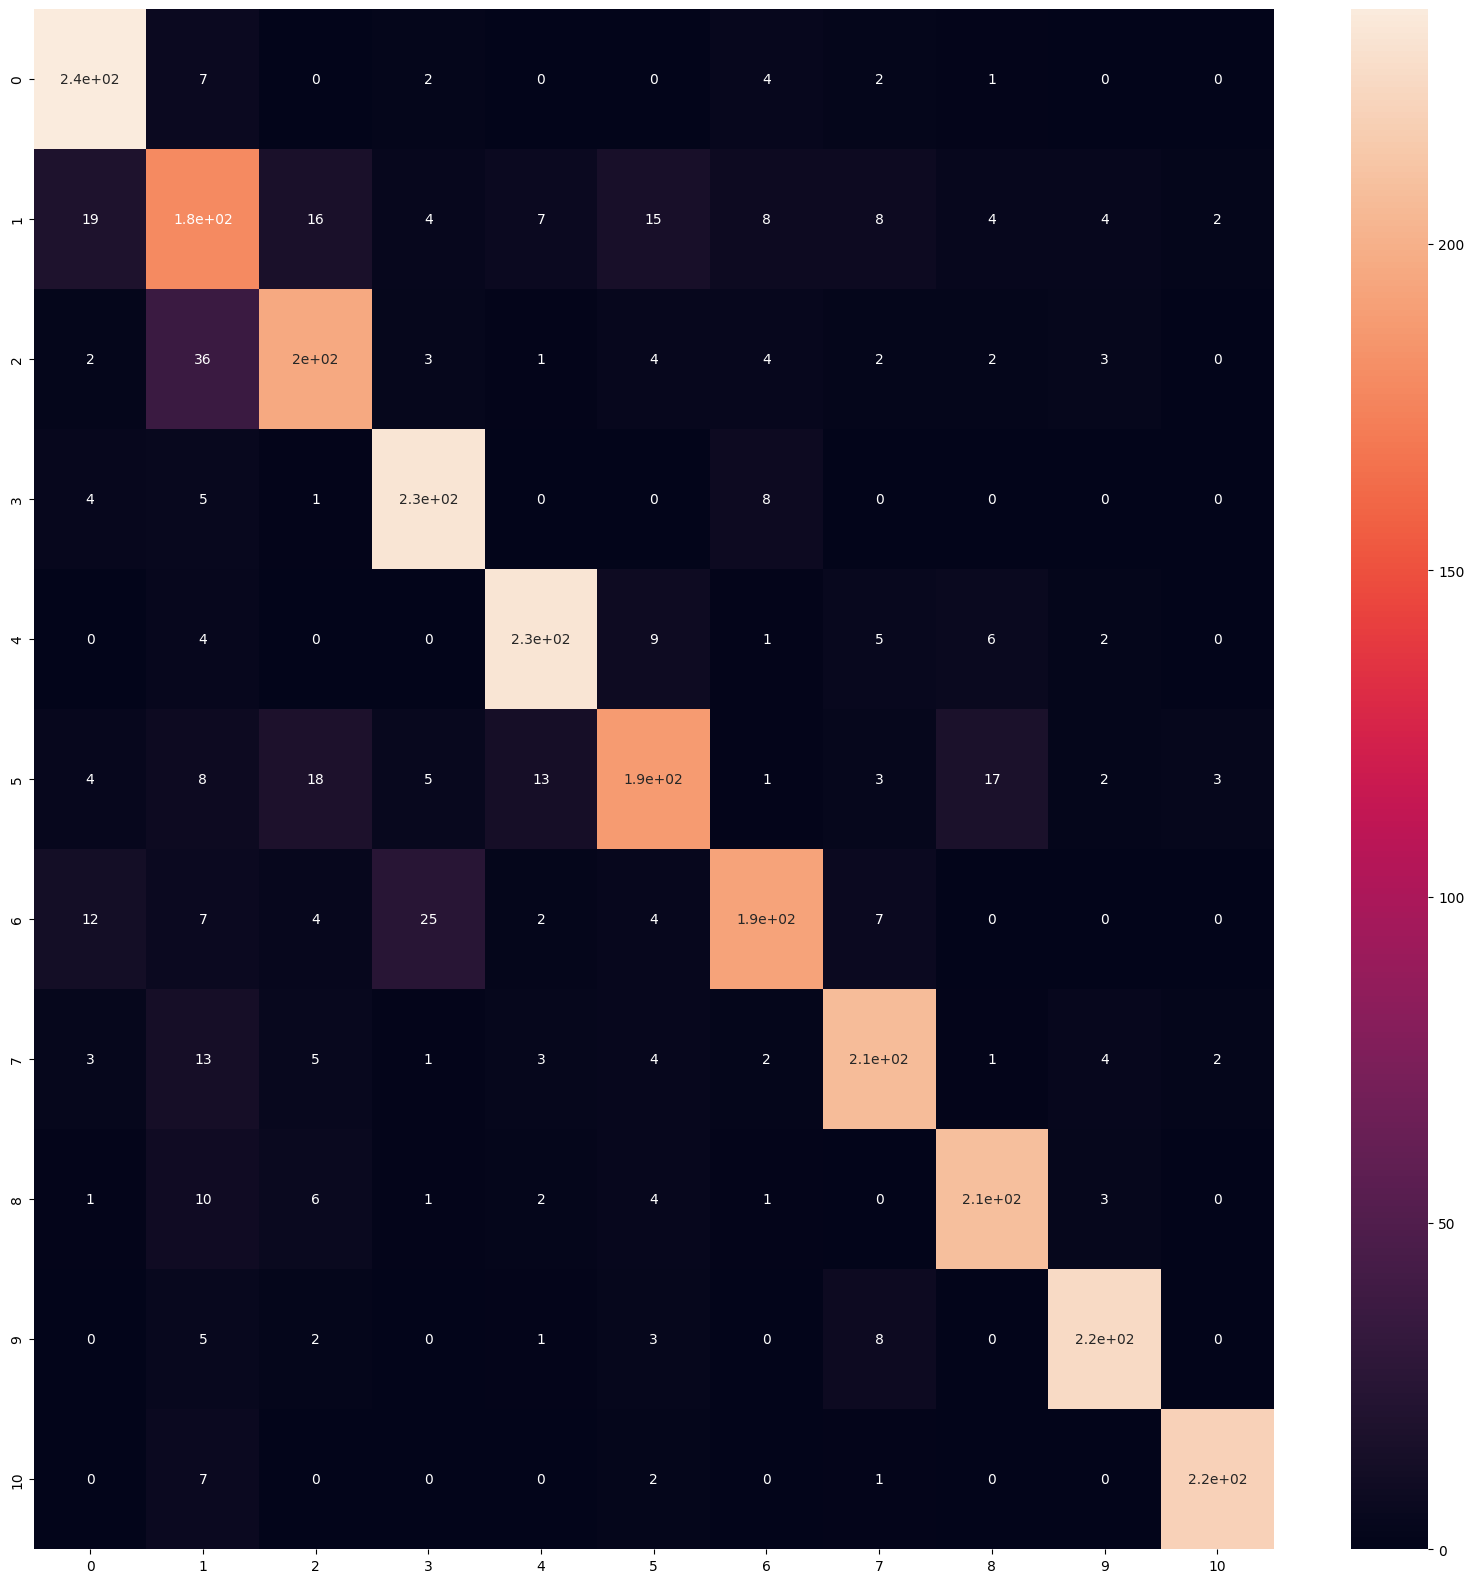

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(Y_test,Y_pred), annot=True)
print(confusion_matrix(Y_test,Y_pred))